 ## Signal Preprocessing
 Before the raw signal can be used by the machine learning algorithms it must be preprocessed.  This
 notebook will perform the different preprocessing steps on some sample signals to visually verify they
 are functioning properly.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.pipeline import Pipeline
from src.data.generators import data_generator_levels, data_generator_signals
from src.models.encoders.levelbinary import LevelBinary
from src.models.encoders.levelmulti import LevelMulti
from src.models.transformers.filter import Filter
from src.models.transformers.baseline import Baseline
from src.models.transformers.truncate import Truncate

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


 ## Encoding Target Values
 The target value for this project is a floating point concentation value.  This value must be
 encoded into a class value in order to help analyze the results of each algorithm.  The following
 code will geneate a sample with one in each of the target classes.  The encoders are then used
 determine the class values.

In [2]:
cvals = np.array([0.15, 0.50, 0.85])
xvalues, ylevel, blexps, ydata0 = data_generator_levels(cvals)
signals = data_generator_signals(cvals, noise=0.0)

ynormal = LevelBinary(targetmin=0.2, targetmax=0.8).transform(cvals)
ymulti = LevelMulti(targetmin=0.2, targetmax=0.8).transform(cvals)
print(cvals)
print(ynormal)
print(ymulti)


[0.15 0.5  0.85]
[1 0 1]
[0 1 2]


 ## Preprocessing Pipeline
 The raw signal from each sample will be run through the different steps of the preprocessing
 pipeline.  The following code and plots will show the output of these different steps to ensure
 the entire transformation produces the best input signal for the machine learning
 algorithms.  The following table gives a brief description of each preprocessing step.

 | Step      | Description                                                                          |
 |:----------|:-------------------------------------------------------------------------------------|
 | filter    | Applys Savitsky-Golay filter to raw data to smooth out the signal.                   |
 | baseline  | Determines baseline signal from the input signal.                                    |
 | correct   | Performs baseline correction by subtracting off the baseline signal.                 |
 | truncate  | Slices the input signal to only output the region of interest from the signal.       |

In [3]:
xmin = 200
xmax = 450
datapipeline = Pipeline([
    ('filter', Filter(windowsize=15, polyorder=2)),
    ('baseline', Baseline(polyorder=3, weight=0.95, outbaseline=True)),  
    ('correct', Baseline(polyorder=3, weight=0.95)),             
    ('truncate', Truncate(xmin=xmin, xmax=xmax))   
])

ydata_fl = datapipeline.named_steps['filter'].transform(ydata0.copy())
ydata_bl = datapipeline.named_steps['baseline'].transform(ydata_fl.copy())
ydata_cs = datapipeline.named_steps['correct'].transform(ydata_fl.copy())
ydata_tr = datapipeline.named_steps['truncate'].transform(ydata_cs.copy())


 ## Baseline Signal (Full Signal)
 The following set of plots will show the raw signal and the computed baseline signal for
 each sample.  The pure signal used to generate the sample is also displayed.

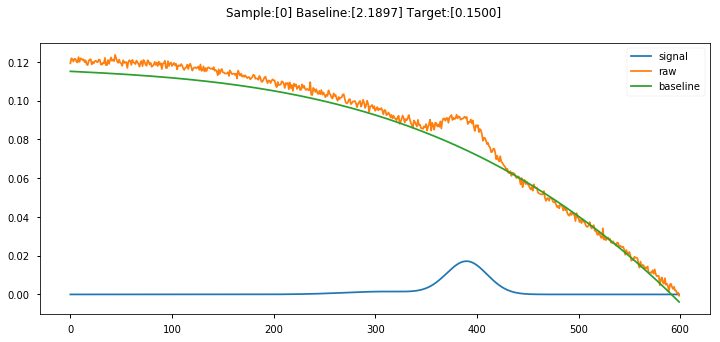

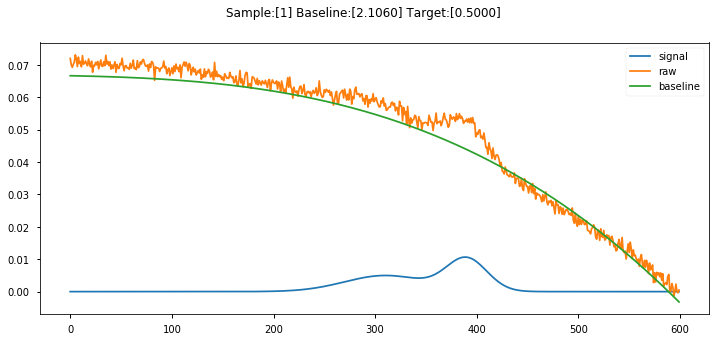

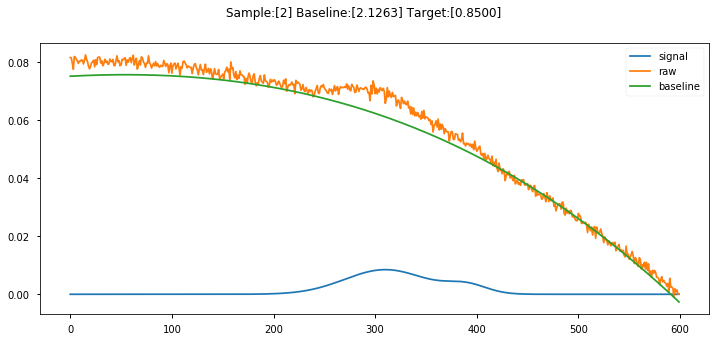

In [4]:
for i in range(3):
    fig, axs = plt.subplots()
    axs.plot(xvalues, signals[i], label='signal') 
    axs.plot(xvalues, ydata0[i], label='raw')
    axs.plot(xvalues, ydata_bl[i], label='baseline')    
    fig.suptitle('Sample:[{0}] Baseline:[{1:.4f}] Target:[{2:.4f}]'.format(i, blexps[i], ylevel[i]))         
    plt.legend()


 ## Baseline Signal (Region of Interest)
 The following set of plots will show the different lines computed from the preprocessing
 pipeline in only the region of interest for this analysis.  It will include the filtered/smoothed
 signal line since this line is visible is this chart.

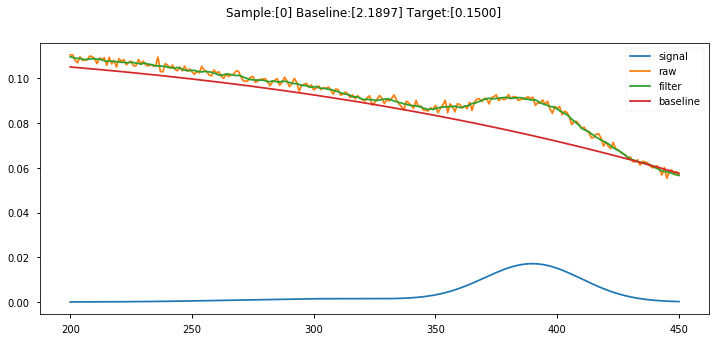

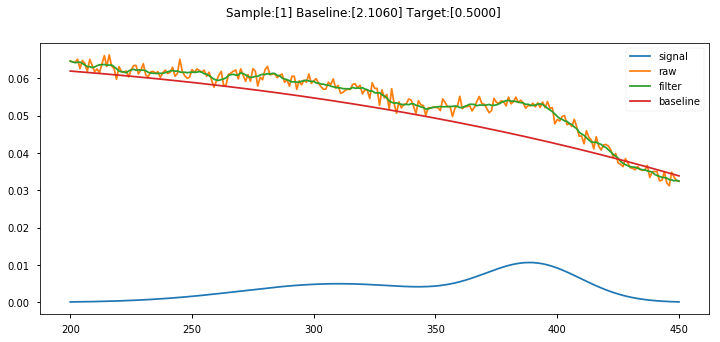

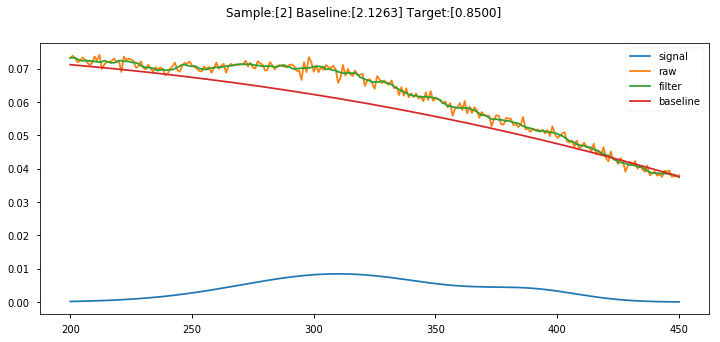

In [5]:
for i in range(3):
    fig, axs = plt.subplots()
    axs.plot(xvalues[xmin:xmax+1], signals[i, xmin:xmax+1], label='signal')    
    axs.plot(xvalues[xmin:xmax+1], ydata0[i, xmin:xmax+1], label='raw')
    axs.plot(xvalues[xmin:xmax+1], ydata_fl[i, xmin:xmax+1], label='filter')    
    axs.plot(xvalues[xmin:xmax+1], ydata_bl[i, xmin:xmax+1], label='baseline')    
    fig.suptitle('Sample:[{0}] Baseline:[{1:.4f}] Target:[{2:.4f}]'.format(i, blexps[i], ylevel[i]))         
    plt.legend()


 ## Baseline Corrected Signal (Region of Interest)
 The following set of plots will show the baseline corrected lines computed from the preprocessing
 pipeline in only the region of interest for this analysis.  This data displayed in these charts
 will end up being the data that will be used by the machine learning algorithms.

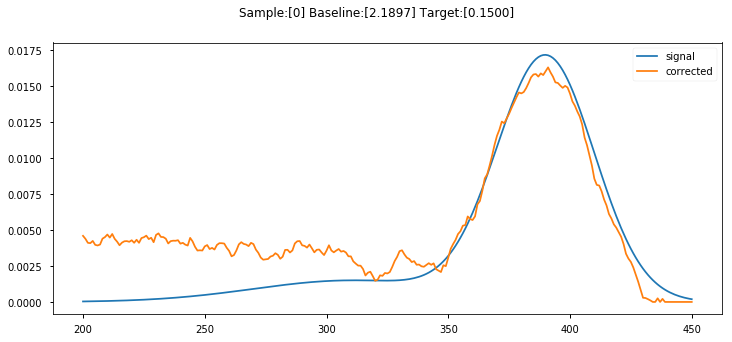

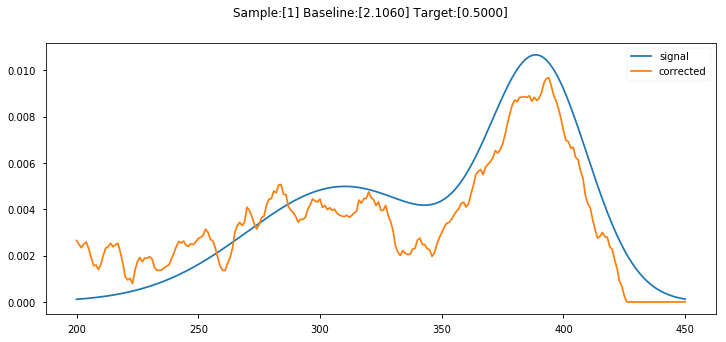

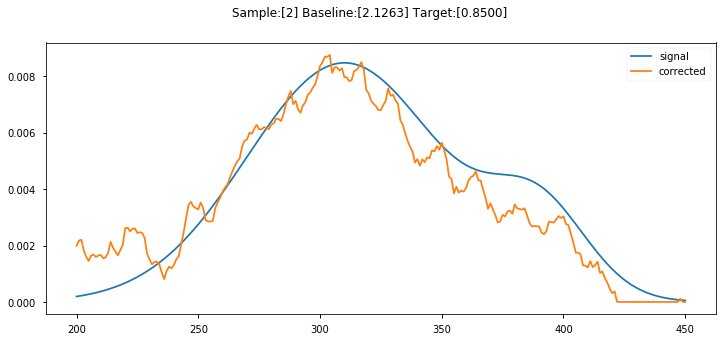

In [6]:
for i in range(3):
    fig, axs = plt.subplots()
    axs.plot(xvalues[xmin:xmax+1], signals[i, xmin:xmax+1], label='signal')    
    axs.plot(xvalues[xmin:xmax+1], ydata_tr[i], label='corrected')
    fig.suptitle('Sample:[{0}] Baseline:[{1:.4f}] Target:[{2:.4f}]'.format(i, blexps[i], ylevel[i]))         
    plt.legend()
